In [1]:
import pymongo
import pandas as pd
import numpy as np
from pathlib import Path
from logging import Logger, StreamHandler

### Establish DB Connection

In [3]:
db_name = "arxiv-db"
collection_name = "arxiv-dataset-collection"

db = pymongo.MongoClient(host="localhost", port=21000).get_database(db_name)
collection = db[collection_name]
collection

Collection(Database(MongoClient(host=['localhost:21000'], document_class=dict, tz_aware=False, connect=True), 'arxiv-db'), 'arxiv-dataset-collection')

### Load data

In [4]:
all_data_df = pd.DataFrame(collection.find({}, {"title", "abstract", "categories"}))
all_data_df.shape

(2258347, 4)

In [5]:
all_data_df.head()

,_id,title,categories,abstract
0,64729c935ced617335d85d64,Calculation of prompt diphoton production cros...,hep-ph,A fully differential calculation in perturba...
1,64729c935ced617335d85d65,Sparsity-certifying Graph Decompositions,math.CO cs.CG,"We describe a new algorithm, the $(k,\ell)$-..."
2,64729c935ced617335d85d66,The evolution of the Earth-Moon system based o...,physics.gen-ph,The evolution of Earth-Moon system is descri...
3,64729c935ced617335d85d67,A determinant of Stirling cycle numbers counts...,math.CO,We show that a determinant of Stirling cycle...
4,64729c935ced617335d85d68,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,math.CA math.FA,In this paper we show how to compute the $\L...


In [6]:
all_data_df['categories_list'] = all_data_df[['categories']].applymap(lambda x: x.split())

In [6]:
all_data_df.head()

,_id,title,categories,abstract,categories_list
0,64729c935ced617335d85d64,Calculation of prompt diphoton production cros...,hep-ph,A fully differential calculation in perturba...,[hep-ph]
1,64729c935ced617335d85d65,Sparsity-certifying Graph Decompositions,math.CO cs.CG,"We describe a new algorithm, the $(k,\ell)$-...","[math.CO, cs.CG]"
2,64729c935ced617335d85d66,The evolution of the Earth-Moon system based o...,physics.gen-ph,The evolution of Earth-Moon system is descri...,[physics.gen-ph]
3,64729c935ced617335d85d67,A determinant of Stirling cycle numbers counts...,math.CO,We show that a determinant of Stirling cycle...,[math.CO]
4,64729c935ced617335d85d68,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,math.CA math.FA,In this paper we show how to compute the $\L...,"[math.CA, math.FA]"


In [7]:
# label counts
all_data_df['label_counts'] = all_data_df[['categories_list']].applymap(len)

<Axes: ylabel='Frequency'>

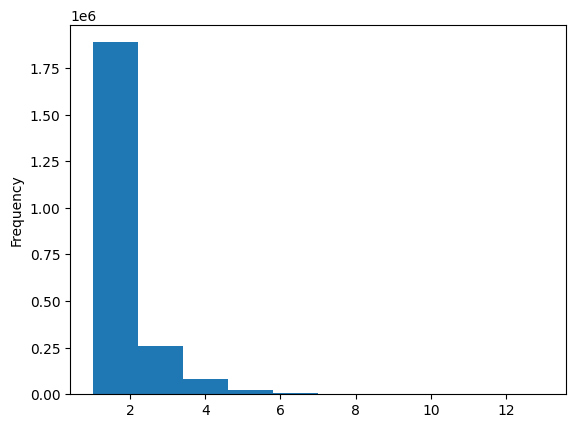

In [10]:
all_data_df['label_counts'].sort_values(ascending=False).plot.hist(bins=10)

In [11]:
bin_ranges = pd.cut(all_data_df['label_counts'], bins=10)
bin_ranges.value_counts()

label_counts
(0.988, 2.2]    1888275
(2.2, 3.4]       257853
(3.4, 4.6]        83304
(4.6, 5.8]        23099
(5.8, 7.0]         5630
(7.0, 8.2]          138
(8.2, 9.4]           31
(9.4, 10.6]          14
(10.6, 11.8]          2
(11.8, 13.0]          1
Name: count, dtype: int64

### Labels Exploration

In [23]:
# this block is created using Chat GPT

from anytree import Node, RenderTree

# Define a helper function to create tree nodes
def create_node(name, parent=None):
    return Node(name, parent=parent)

def build_tree(variable_list):
    # Create the root node
    root = create_node('Root')

    # Iterate over each example
    for example in variable_list:
        current_node = root

        # Iterate over each variable in the example
        for variable in example:
            # Check if the variable already exists as a child node
            existing_node = next((child for child in current_node.children if child.name == variable), None)

            if existing_node:
                # If the variable already exists, move to the existing node
                current_node = existing_node
            else:
                # If the variable does not exist, create a new node and move to the new node
                current_node = create_node(variable, parent=current_node)

    # Display the tree
    for pre, _, node in RenderTree(root):
        print(f"{pre}{node.name}")

    return root

In [24]:
# example - created using Chat GPT
# List of variables from multiple examples
variable_list = [
    ['A', 'B', 'C'],
    ['A', 'D', 'E'],
    ['A', 'B', 'F'],
    ['G', 'H', 'I']
]
build_tree(variable_list)

Root
├── A
│   ├── B
│   │   ├── C
│   │   └── F
│   └── D
│       └── E
└── G
    └── H
        └── I


Node('/Root')

In [25]:
arxiv_labels_root = build_tree(all_data_df['categories_list'].tolist())
arxiv_labels_root

Root
├── hep-ph
│   ├── hep-lat
│   │   ├── nucl-th
│   │   │   ├── physics.comp-ph
│   │   │   ├── physics.atom-ph
│   │   │   ├── quant-ph
│   │   │   └── physics.data-an
│   │   ├── hep-th
│   │   │   ├── nucl-th
│   │   │   │   └── quant-ph
│   │   │   ├── math-ph
│   │   │   │   └── math.MP
│   │   │   │       └── nucl-th
│   │   │   ├── nucl-ex
│   │   │   │   └── nucl-th
│   │   │   ├── quant-ph
│   │   │   └── math.CO
│   │   │       └── math.QA
│   │   │           └── math.RA
│   │   ├── nucl-ex
│   │   │   └── nucl-th
│   │   │       ├── physics.data-an
│   │   │       └── physics.atom-ph
│   │   ├── math-ph
│   │   │   └── math.MP
│   │   │       ├── nucl-th
│   │   │       └── quant-ph
│   │   ├── quant-ph
│   │   ├── physics.atom-ph
│   │   ├── physics.comp-ph
│   │   │   └── quant-ph
│   │   └── nlin.PS
│   │       └── nucl-th
│   ├── hep-ex
│   │   ├── nucl-ex
│   │   │   ├── nucl-th
│   │   │   │   ├── physics.atom-ph
│   │   │   │   ├── quant-ph
│   │   │   │   ├── phy

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
from anytree import PreOrderIter
from collections import Counter


def get_overlapping_labels(root):
    all_labels = [node.name for node in PreOrderIter(root)]
    label_counts = Counter(all_labels)
    overlapping_labels = [label for label, count in label_counts.items() if count > 1]
    overlapping_counts = [count for label, count in label_counts.items() if label in overlapping_labels]
    return overlapping_labels, overlapping_counts

def sort_labels_by_unique_parents(root):
    label_parents = {}
    for node in PreOrderIter(root):
        if node.is_leaf:
            label = node.name
            parent = node.parent
            if label not in label_parents:
                label_parents[label] = set()
            label_parents[label].add(parent)
    
    label_unique_parents = {label: len(parents) for label, parents in label_parents.items()}
    sorted_labels = sorted(label_unique_parents.keys(), key=lambda label: label_unique_parents[label], reverse=True)
    sorted_counts = [label_unique_parents[label] for label in sorted_labels]
    return sorted_labels, sorted_counts

In [33]:
# Assuming you already have the 'root' object from the previous code

# Fetch overlapping labels and their counts
overlapping_labels, overlapping_counts = get_overlapping_labels(arxiv_labels_root)
print("Overlapping labels:", overlapping_labels)
print("\n\nOverlapping counts:", overlapping_counts)

Overlapping labels: ['hep-ph', 'hep-lat', 'nucl-th', 'physics.comp-ph', 'physics.atom-ph', 'quant-ph', 'physics.data-an', 'hep-th', 'math-ph', 'math.MP', 'nucl-ex', 'math.CO', 'math.QA', 'math.RA', 'nlin.PS', 'hep-ex', 'physics.ins-det', 'physics.acc-ph', 'physics.geo-ph', 'physics.hist-ph', 'physics.ed-ph', 'physics.optics', 'math.DG', 'physics.soc-ph', 'physics.pop-ph', 'stat.ML', 'physics.plasm-ph', 'math.AG', 'math.ST', 'stat.TH', 'nlin.AO', 'stat.ME', 'physics.atm-clus', 'stat.AP', 'physics.chem-ph', 'math.PR', 'physics.space-ph', 'physics.flu-dyn', 'physics.class-ph', 'math.RT', 'math.CA', 'physics.gen-ph', 'math.NA', 'math.NT', 'nlin.SI', 'solv-int', 'q-alg', 'astro-ph', 'gr-qc', 'nlin.CD', 'cond-mat.supr-con', 'astro-ph.HE', 'cond-mat.stat-mech', 'cond-mat.other', 'cond-mat.soft', 'cond-mat', 'patt-sol', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'cond-mat.mes-hall', 'cond-mat.dis-nn', 'astro-ph.CO', 'bayes-an', 'chao-dyn', 'astro-ph.IM', 'astro-ph.SR', 'astro-ph.GA', 'stat.CO', '

In [35]:
# Sort labels based on the number of unique parents and their counts
sorted_labels, sorted_counts = sort_labels_by_unique_parents(arxiv_labels_root)
print("Sorted labels:", sorted_labels)
print("\n\nSorted counts:", sorted_counts)

Sorted labels: ['quant-ph', 'stat.ML', 'stat.TH', 'physics.comp-ph', 'math.MP', 'physics.flu-dyn', 'physics.optics', 'physics.soc-ph', 'math.OC', 'math.PR', 'q-bio.QM', 'stat.AP', 'physics.data-an', 'math.RT', 'math.IT', 'physics.plasm-ph', 'math.NA', 'nucl-th', 'q-bio.PE', 'stat.ME', 'cs.LG', 'physics.space-ph', 'nlin.SI', 'physics.ins-det', 'physics.chem-ph', 'q-bio.NC', 'nlin.CD', 'math.RA', 'math.SP', 'physics.geo-ph', 'eess.SY', 'math.NT', 'stat.CO', 'hep-th', 'math.SG', 'physics.class-ph', 'math.QA', 'cs.SE', 'math.CO', 'math.MG', 'cs.SI', 'eess.SP', 'physics.atom-ph', 'math.DS', 'physics.bio-ph', 'nlin.PS', 'physics.med-ph', 'q-bio.MN', 'math.LO', 'cs.NE', 'cs.RO', 'nlin.AO', 'math.OA', 'q-bio.TO', 'q-fin.EC', 'eess.IV', 'eess.AS', 'physics.pop-ph', 'hep-ph', 'physics.app-ph', 'q-bio.BM', 'cs.PF', 'math.GT', 'physics.hist-ph', 'cs.NI', 'q-fin.ST', 'math.DG', 'stat.OT', 'q-fin.TR', 'cs.SY', 'cs.PL', 'math.FA', 'q-bio.SC', 'q-bio', 'nlin.CG', 'cs.LO', 'math.GR', 'q-bio.OT', 'q-fin

In [38]:
# Get nodes at level

from anytree import Node, LevelOrderGroupIter

# Function to get nodes or leaves at a specific level
def get_nodes_at_level(root, level):
    nodes = []
    for node in LevelOrderGroupIter(root):
        if node[0].depth == level:
            nodes.extend(node)
    return nodes

In [40]:
level_1_nodes = get_nodes_at_level(arxiv_labels_root, level=1)
len(level_1_nodes)

172

In [48]:
unique_level1_nodes = list(set([x.name for x in level_1_nodes]))
len(unique_level1_nodes)

172

In [41]:
level_2_nodes = get_nodes_at_level(arxiv_labels_root, level=2)
len(level_2_nodes)

10893

In [50]:
unique_level2_nodes = list(set([x.name for x in level_2_nodes]))
len(unique_level2_nodes)

173

In [52]:
level_3_nodes = get_nodes_at_level(arxiv_labels_root, level=3)
len(level_3_nodes)

37690

In [53]:
unique_level3_nodes = list(set([x.name for x in level_3_nodes]))
len(unique_level3_nodes)

171

In [55]:
set(unique_level1_nodes) - set(unique_level2_nodes)

{'cmp-lg', 'patt-sol', 'solv-int'}

In [56]:
set(unique_level2_nodes) - set(unique_level1_nodes)

{'math.IT', 'math.MP', 'q-bio', 'stat.TH'}

In [57]:
set(unique_level2_nodes) - set(unique_level3_nodes)

{'acc-phys', 'adap-org', 'alg-geom', 'ao-sci'}

In [58]:
set(unique_level3_nodes) - set(unique_level2_nodes)

{'patt-sol', 'solv-int'}

In [59]:
set(unique_level1_nodes) - set(unique_level3_nodes)

{'acc-phys', 'adap-org', 'alg-geom', 'ao-sci', 'cmp-lg'}

In [60]:
set(unique_level3_nodes) - set(unique_level1_nodes)

{'math.IT', 'math.MP', 'q-bio', 'stat.TH'}

### Category Labels Observations
- Categories don't have fixed tree levels. And they often overlap across multiple levels for different articles.
    - Sometimes some category is at level 1, whereas other times it is at the leaf level that could be 2 or 3 levels below the root level
- Considering the mixed nature of category label associations, it'd be inappropriate to treat this problem as a simple single-label classification problem.
    - One article can be classified into multiple possible categories.
- Also, considering the overlapping nature of category labels, it'd be interesting to see the resulting latent classes, and corresponding categories associated with group of latent classes.

### EDA

In [12]:
all_data_df.head()

,_id,title,categories,abstract,categories_list,label_counts
0,64729c935ced617335d85d64,Calculation of prompt diphoton production cros...,hep-ph,A fully differential calculation in perturba...,[hep-ph],1
1,64729c935ced617335d85d65,Sparsity-certifying Graph Decompositions,math.CO cs.CG,"We describe a new algorithm, the $(k,\ell)$-...","[math.CO, cs.CG]",2
2,64729c935ced617335d85d66,The evolution of the Earth-Moon system based o...,physics.gen-ph,The evolution of Earth-Moon system is descri...,[physics.gen-ph],1
3,64729c935ced617335d85d67,A determinant of Stirling cycle numbers counts...,math.CO,We show that a determinant of Stirling cycle...,[math.CO],1
4,64729c935ced617335d85d68,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,math.CA math.FA,In this paper we show how to compute the $\L...,"[math.CA, math.FA]",2


### Basic Preprocessing
- Avoiding processing special symbols, as some formulas are rather captured / escaped with special symbols.
    - LM's like BERT are architecturally capable of capturing the contextual purpose of stop words.
- Only applying space to `\n` as we still have reliable bunch of full stops. That'd be easily identified as end of sentence.
    - Although, in case of multiple sentences with full stops for each, we need to add `[SEP]` token manually, as BERT pretrained tokenizer doesn't add `[SEP]` tokens.

In [8]:
sample_text = all_data_df.loc[0, 'abstract']
sample_text

'  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from the Fermilab Tevatron, and predictions are made for\nmore detailed tests with CDF and DO data. Predictions are shown for\ndistributions of diphoton pairs produced at the energy of the Large Hadron\nCollider (LHC). Distributions of the diphoton pairs from the decay of a Higgs\nboson are contrasted with those produced from QCD processes at the LHC, showing\nthat enhanced sensitivity to the signal can be obtained with judicious\nselection of events.\n'

In [9]:
def preprocess_text(text):
    # Trim whitespace from the left and right
    text = text.strip()

    # Replace newline characters with spaces
    text = text.replace('\n', ' ')

    # Add [SEP] tokens after each full stop
    text = text.replace('.', ' [SEP]')

    return text

In [10]:
all_data_df['abstract'] = all_data_df[['abstract']].applymap(preprocess_text)

In [11]:
sample_text2 = all_data_df.loc[0, 'abstract']
sample_text2

'A fully differential calculation in perturbative quantum chromodynamics is presented for the production of massive photon pairs at hadron colliders [SEP] All next-to-leading order perturbative contributions from quark-antiquark, gluon-(anti)quark, and gluon-gluon subprocesses are included, as well as all-orders resummation of initial-state gluon radiation valid at next-to-next-to-leading logarithmic accuracy [SEP] The region of phase space is specified in which the calculation is most reliable [SEP] Good agreement is demonstrated with data from the Fermilab Tevatron, and predictions are made for more detailed tests with CDF and DO data [SEP] Predictions are shown for distributions of diphoton pairs produced at the energy of the Large Hadron Collider (LHC) [SEP] Distributions of the diphoton pairs from the decay of a Higgs boson are contrasted with those produced from QCD processes at the LHC, showing that enhanced sensitivity to the signal can be obtained with judicious selection of e

In [12]:
all_data_df['abstract_word_count'] = all_data_df[['abstract']].applymap(lambda x: len(x.split()))

In [22]:
word_counts_df = pd.DataFrame(all_data_df['abstract_word_count'].value_counts())
word_counts_df.sort_values('abstract_word_count', ascending=False).to_dict()

{'abstract_word_count': {105: 13646,
  104: 13599,
  103: 13261,
  108: 13201,
  102: 13170,
  156: 13113,
  110: 13078,
  100: 13040,
  106: 13032,
  112: 13012,
  101: 12989,
  107: 12983,
  98: 12976,
  109: 12974,
  111: 12932,
  129: 12909,
  99: 12894,
  113: 12893,
  114: 12890,
  127: 12872,
  121: 12869,
  120: 12852,
  123: 12832,
  119: 12831,
  155: 12794,
  118: 12781,
  126: 12779,
  117: 12775,
  97: 12773,
  130: 12767,
  125: 12732,
  124: 12732,
  157: 12715,
  95: 12706,
  122: 12693,
  131: 12671,
  96: 12648,
  116: 12642,
  93: 12586,
  132: 12552,
  115: 12546,
  94: 12520,
  128: 12480,
  154: 12471,
  133: 12434,
  92: 12426,
  91: 12391,
  90: 12375,
  134: 12361,
  135: 12344,
  136: 12339,
  89: 12317,
  149: 12290,
  151: 12273,
  153: 12244,
  148: 12205,
  139: 12202,
  143: 12178,
  144: 12167,
  158: 12163,
  138: 12158,
  140: 12136,
  150: 12123,
  137: 12113,
  146: 12108,
  142: 12087,
  152: 12077,
  145: 12073,
  87: 12016,
  88: 12011,
  141: 119

In [23]:
def get_human_readable_stats(df: pd.DataFrame):
    statistics = df.describe().apply(lambda x: x.apply('{:.2f}'.format))
    return statistics

In [24]:
get_human_readable_stats(all_data_df)

,label_counts,abstract_word_count
count,2258347.00,2258347.00
mean,1.68,145.08
std,0.92,66.81
min,1.00,2.00
25%,1.00,94.00
50%,1.00,138.00
75%,2.00,190.00
max,13.00,955.00


In [25]:
def apply_thresholding_to_df(df: pd.DataFrame, column_name: str, threshold=0.75, above_or_below: bool=False):
    """
    above: True
    below: False
    """
    
    threshold = df[column_name].quantile(threshold)

    # Select rows where the value in 'column_name' is >= 75th percentile
    if above_or_below:
        selected_df = df[df[column_name] >= threshold]
    else:
        selected_df = df[df[column_name] < threshold]
    
    return selected_df

### Above 75th percentile word count

In [26]:
above_75_percentile = apply_thresholding_to_df(df=all_data_df, column_name='abstract_word_count', threshold=0.75, above_or_below=True)
above_75_percentile.shape

(570828, 7)

In [27]:
above_75_percentile.head()

,_id,title,categories,abstract,categories_list,label_counts,abstract_word_count
8,64729c935ced617335d85d6c,"The Spitzer c2d Survey of Large, Nearby, Inste...",astro-ph,We discuss the results from the combined IRAC ...,[astro-ph],1,293
16,64729c935ced617335d85d74,Spectroscopic Observations of the Intermediate...,astro-ph,Results from spectroscopic observations of the...,[astro-ph],1,247
21,64729c935ced617335d85d79,Stochastic Lie group integrators,math.NA,We present Lie group integrators for nonlinear...,[math.NA],1,220
22,64729c935ced617335d85d7a,ALMA as the ideal probe of the solar chromosphere,astro-ph,"The very nature of the solar chromosphere, its...",[astro-ph],1,226
43,64729c935ced617335d85d8f,Astrophysical gyrokinetics: kinetic and fluid ...,astro-ph nlin.CD physics.plasm-ph physics.spac...,We present a theoretical framework for plasma ...,"[astro-ph, nlin.CD, physics.plasm-ph, physics....",4,278


In [28]:
get_human_readable_stats(above_75_percentile)

,label_counts,abstract_word_count
count,570828.00,570828.00
mean,1.73,236.08
std,0.95,34.27
min,1.00,190.00
25%,1.00,207.00
50%,1.00,229.00
75%,2.00,260.00
max,10.00,955.00


### Below 25th percentile word count

In [29]:
below_25_percentile = apply_thresholding_to_df(df=all_data_df, column_name='abstract_word_count', threshold=0.25, above_or_below=False)
below_25_percentile.shape

(556678, 7)

In [30]:
below_25_percentile.head()

,_id,title,categories,abstract,categories_list,label_counts,abstract_word_count
3,64729c935ced617335d85d67,A determinant of Stirling cycle numbers counts...,math.CO,We show that a determinant of Stirling cycle n...,[math.CO],1,37
4,64729c935ced617335d85d68,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,math.CA math.FA,In this paper we show how to compute the $\Lam...,"[math.CA, math.FA]",2,39
10,64729c935ced617335d85d6e,Computing genus 2 Hilbert-Siegel modular forms...,math.NT math.AG,In this paper we present an algorithm for comp...,"[math.NT, math.AG]",2,51
11,64729c935ced617335d85d6f,Distribution of integral Fourier Coefficients ...,math.NT,"Recently, Bruinier and Ono classified cusp for...",[math.NT],1,87
13,64729c935ced617335d85d71,Iterated integral and the loop product,math.CA math.AT,In this article we discuss a relation between ...,"[math.CA, math.AT]",2,28


In [31]:
get_human_readable_stats(below_25_percentile)

,label_counts,abstract_word_count
count,556678.00,556678.00
mean,1.57,64.88
std,0.86,20.30
min,1.00,2.00
25%,1.00,51.00
50%,1.00,68.00
75%,2.00,82.00
max,13.00,93.00


### Outliers - Above 500 Word Count

In [32]:
above_500_df = all_data_df[all_data_df['abstract_word_count'] > 500]
above_500_df.shape

(38, 7)

In [33]:
get_human_readable_stats(above_500_df)

,label_counts,abstract_word_count
count,38.00,38.00
mean,1.47,565.47
std,0.83,86.87
min,1.00,502.00
25%,1.00,517.25
50%,1.00,531.00
75%,2.00,581.50
max,5.00,955.00


### Outliers - Below 27 Word Count

In [34]:
below_27_df = all_data_df[all_data_df['abstract_word_count'] <= 27]
below_27_df.shape

(31421, 7)

In [35]:
get_human_readable_stats(below_27_df)

,label_counts,abstract_word_count
count,31421.00,31421.00
mean,1.48,20.37
std,0.78,5.16
min,1.00,2.00
25%,1.00,17.00
50%,1.00,21.00
75%,2.00,25.00
max,7.00,27.00


In [36]:
below_27_df.head()

,_id,title,categories,abstract,categories_list,label_counts,abstract_word_count
33,64729c935ced617335d85d85,Origin of adaptive mutants: a quantum measurem...,q-bio.PE q-bio.CB quant-ph,This is a supplement to the paper arXiv:q-bio/...,"[q-bio.PE, q-bio.CB, quant-ph]",3,19
70,64729c935ced617335d85daa,Pairwise comparisons of typological profiles (...,physics.soc-ph,No abstract given; compares pairs of languages...,[physics.soc-ph],1,14
100,64729c935ced617335d85dc8,The birth of string theory,hep-th,In this contribution we go through the develop...,[hep-th],1,25
101,64729c935ced617335d85dc9,Duality and Tameness,math.AC math.AG,We prove a duality theorem for certain graded ...,"[math.AC, math.AG]",2,24
107,64729c935ced617335d85dcf,Reducing SAT to 2-SAT,cs.CC,Description of a polynomial time reduction of ...,[cs.CC],1,14


In [37]:
outliers_df = pd.concat([above_500_df, below_27_df])
outliers_df.shape

(31459, 7)

In [40]:
outliers_df = outliers_df.drop(columns=['_id'])
outliers_df.to_parquet("outliers_df.pq")

### Outliers
- Outlier articles are 22 where the way they were treated as was based on the word count for their abstracts > 500 words (this is before tokenization).
    - Pretrained BERT model was only trained on 512 tokens for single sequence
    - 99.99% articles in the dataset have abstracts less than 500 tokens
    - Therefore, considering using advanced techniques to accommodate for sequence length longer than 512 for 0.000009742% of articles would be a step too far for this exercise.
    - Hence, skipping these 22 articles from initial training, test, validation datasets.
    - Although, we can include this as a separate outlier dataset, where we do the inference using only initial N number of words and cutting off threshold at 512 tokens max.

- Also treating 25th percentile of 25th percentile of word counts, where first 25th percentile was around 48 words, and 25th percentile of that was 27 words.
    - This would also help us avoid too much sparsity in embeddings.
    - Most of the abstracts in this threshold were just single sentence abstracts, with extremes being single word.
    - Some of them were invitations for papers, which are not really abstracts.

### Train Test Validation Data Selection

In [41]:
all_unique_categories = set()

[all_unique_categories.update(x) for x in all_data_df['categories_list']]
all_unique_categories = list(all_unique_categories)
len(all_unique_categories)

176

In [48]:
# (train, validation, test)
data_distributions = (
    (40, 20, 40),
    (60, 10, 30),
    (60, 20, 20),
    (70, 10, 20)
)

In [50]:
all_data_df = all_data_df.drop(columns=['_id'])

In [52]:
target_category = all_unique_categories[0]
category_filter = all_data_df[['categories_list']].applymap(lambda x: x[0] == target_category).values
category_df = all_data_df[category_filter]
category_df.shape

(10334, 6)

In [55]:
distribution_tuple

(60, 20, 20)

In [58]:
distribution_tuple[0] / 100

0.6

In [59]:
train_n = int(len(category_df) * (distribution_tuple[0] / 100))
validation_n = int(len(category_df) * (distribution_tuple[1] / 100))
test_n = int(len(category_df) * (distribution_tuple[2] / 100))

In [60]:
train_n, validation_n, test_n

(6200, 2066, 2066)

In [61]:
from tqdm import tqdm

random_state = 65

dataframes = {}

def append_df(target_df: pd.DataFrame, df_name:str):
    df = dataframes.get(df_name)
    
    if df is None:
        df = pd.DataFrame()
    
    df = pd.concat([df, target_df])
    dataframes[df_name] = df
    

for target_category in all_unique_categories:
    category_filter = all_data_df[['categories_list']].applymap(lambda x: x[0] == target_category).values
    category_df = all_data_df[category_filter]

    if len(category_df) > 3:
        for dataset_index, distribution_tuple in enumerate(data_distributions):
            train_n = int(len(category_df) * (distribution_tuple[0] / 100))
            validation_n = int(len(category_df) * (distribution_tuple[1] / 100))
            test_n = int(len(category_df) * (distribution_tuple[2] / 100))

            train_df = category_df.sample(n=train_n, random_state=random_state)
            remaining = category_df[~category_df.index.isin(train_df.index)]

            validation_df = remaining.sample(n=validation_n, random_state=random_state)

            test_df = remaining[~remaining.index.isin(validation_df.index)]

            print(f"Dataset {dataset_index + 1} - Train: {train_df.shape}, Validation: {validation_df.shape}, Test: {test_df.shape}")

            append_df(train_df, df_name=f"train_df_dataset_{dataset_index + 1}")
            append_df(validation_df, df_name=f"validation_df_dataset_{dataset_index + 1}")
            append_df(test_df, df_name=f"test_df_dataset_{dataset_index + 1}")
    else:
        print(f"Skipping category: {target_category}")

Dataset 1 - Train: (4133, 6), Validation: (2066, 6), Test: (4135, 6)
Dataset 2 - Train: (6200, 6), Validation: (1033, 6), Test: (3101, 6)
Dataset 3 - Train: (6200, 6), Validation: (2066, 6), Test: (2068, 6)
Dataset 4 - Train: (7233, 6), Validation: (1033, 6), Test: (2068, 6)
Dataset 1 - Train: (788, 6), Validation: (394, 6), Test: (789, 6)
Dataset 2 - Train: (1182, 6), Validation: (197, 6), Test: (592, 6)
Dataset 3 - Train: (1182, 6), Validation: (394, 6), Test: (395, 6)
Dataset 4 - Train: (1379, 6), Validation: (197, 6), Test: (395, 6)
Dataset 1 - Train: (2274, 6), Validation: (1137, 6), Test: (2275, 6)
Dataset 2 - Train: (3411, 6), Validation: (568, 6), Test: (1707, 6)
Dataset 3 - Train: (3411, 6), Validation: (1137, 6), Test: (1138, 6)
Dataset 4 - Train: (3980, 6), Validation: (568, 6), Test: (1138, 6)
Dataset 1 - Train: (5256, 6), Validation: (2628, 6), Test: (5256, 6)
Dataset 2 - Train: (7884, 6), Validation: (1314, 6), Test: (3942, 6)
Dataset 3 - Train: (7884, 6), Validation: (26

Dataset 1 - Train: (1939, 6), Validation: (969, 6), Test: (1941, 6)
Dataset 2 - Train: (2909, 6), Validation: (484, 6), Test: (1456, 6)
Dataset 3 - Train: (2909, 6), Validation: (969, 6), Test: (971, 6)
Dataset 4 - Train: (3394, 6), Validation: (484, 6), Test: (971, 6)
Dataset 1 - Train: (499, 6), Validation: (249, 6), Test: (501, 6)
Dataset 2 - Train: (749, 6), Validation: (124, 6), Test: (376, 6)
Dataset 3 - Train: (749, 6), Validation: (249, 6), Test: (251, 6)
Dataset 4 - Train: (874, 6), Validation: (124, 6), Test: (251, 6)
Dataset 1 - Train: (400, 6), Validation: (200, 6), Test: (401, 6)
Dataset 2 - Train: (600, 6), Validation: (100, 6), Test: (301, 6)
Dataset 3 - Train: (600, 6), Validation: (200, 6), Test: (201, 6)
Dataset 4 - Train: (700, 6), Validation: (100, 6), Test: (201, 6)
Dataset 1 - Train: (6837, 6), Validation: (3418, 6), Test: (6839, 6)
Dataset 2 - Train: (10256, 6), Validation: (1709, 6), Test: (5129, 6)
Dataset 3 - Train: (10256, 6), Validation: (3418, 6), Test: (34

Dataset 1 - Train: (10669, 6), Validation: (5334, 6), Test: (10670, 6)
Dataset 2 - Train: (16003, 6), Validation: (2667, 6), Test: (8003, 6)
Dataset 3 - Train: (16003, 6), Validation: (5334, 6), Test: (5336, 6)
Dataset 4 - Train: (18671, 6), Validation: (2667, 6), Test: (5335, 6)
Dataset 1 - Train: (395, 6), Validation: (197, 6), Test: (396, 6)
Dataset 2 - Train: (592, 6), Validation: (98, 6), Test: (298, 6)
Dataset 3 - Train: (592, 6), Validation: (197, 6), Test: (199, 6)
Dataset 4 - Train: (691, 6), Validation: (98, 6), Test: (199, 6)
Dataset 1 - Train: (27, 6), Validation: (13, 6), Test: (28, 6)
Dataset 2 - Train: (40, 6), Validation: (6, 6), Test: (22, 6)
Dataset 3 - Train: (40, 6), Validation: (13, 6), Test: (15, 6)
Dataset 4 - Train: (47, 6), Validation: (6, 6), Test: (15, 6)
Dataset 1 - Train: (5143, 6), Validation: (2571, 6), Test: (5145, 6)
Dataset 2 - Train: (7715, 6), Validation: (1285, 6), Test: (3859, 6)
Dataset 3 - Train: (7715, 6), Validation: (2571, 6), Test: (2573, 6)


Dataset 2 - Train: (7, 6), Validation: (1, 6), Test: (5, 6)
Dataset 3 - Train: (7, 6), Validation: (2, 6), Test: (4, 6)
Dataset 4 - Train: (9, 6), Validation: (1, 6), Test: (3, 6)
Dataset 1 - Train: (4028, 6), Validation: (2014, 6), Test: (4030, 6)
Dataset 2 - Train: (6043, 6), Validation: (1007, 6), Test: (3022, 6)
Dataset 3 - Train: (6043, 6), Validation: (2014, 6), Test: (2015, 6)
Dataset 4 - Train: (7050, 6), Validation: (1007, 6), Test: (2015, 6)
Dataset 1 - Train: (6458, 6), Validation: (3229, 6), Test: (6458, 6)
Dataset 2 - Train: (9687, 6), Validation: (1614, 6), Test: (4844, 6)
Dataset 3 - Train: (9687, 6), Validation: (3229, 6), Test: (3229, 6)
Dataset 4 - Train: (11301, 6), Validation: (1614, 6), Test: (3230, 6)
Dataset 1 - Train: (180, 6), Validation: (90, 6), Test: (182, 6)
Dataset 2 - Train: (271, 6), Validation: (45, 6), Test: (136, 6)
Dataset 3 - Train: (271, 6), Validation: (90, 6), Test: (91, 6)
Dataset 4 - Train: (316, 6), Validation: (45, 6), Test: (91, 6)
Dataset 1

Dataset 2 - Train: (2692, 6), Validation: (448, 6), Test: (1347, 6)
Dataset 3 - Train: (2692, 6), Validation: (897, 6), Test: (898, 6)
Dataset 4 - Train: (3140, 6), Validation: (448, 6), Test: (899, 6)
Dataset 1 - Train: (13199, 6), Validation: (6599, 6), Test: (13200, 6)
Dataset 2 - Train: (19798, 6), Validation: (3299, 6), Test: (9901, 6)
Dataset 3 - Train: (19798, 6), Validation: (6599, 6), Test: (6601, 6)
Dataset 4 - Train: (23098, 6), Validation: (3299, 6), Test: (6601, 6)
Dataset 1 - Train: (337, 6), Validation: (168, 6), Test: (339, 6)
Dataset 2 - Train: (506, 6), Validation: (84, 6), Test: (254, 6)
Dataset 3 - Train: (506, 6), Validation: (168, 6), Test: (170, 6)
Dataset 4 - Train: (590, 6), Validation: (84, 6), Test: (170, 6)
Dataset 1 - Train: (10324, 6), Validation: (5162, 6), Test: (10324, 6)
Dataset 2 - Train: (15486, 6), Validation: (2581, 6), Test: (7743, 6)
Dataset 3 - Train: (15486, 6), Validation: (5162, 6), Test: (5162, 6)
Dataset 4 - Train: (18067, 6), Validation: (

Dataset 3 - Train: (6, 6), Validation: (2, 6), Test: (3, 6)
Dataset 4 - Train: (7, 6), Validation: (1, 6), Test: (3, 6)
Dataset 1 - Train: (11, 6), Validation: (5, 6), Test: (12, 6)
Dataset 2 - Train: (16, 6), Validation: (2, 6), Test: (10, 6)
Dataset 3 - Train: (16, 6), Validation: (5, 6), Test: (7, 6)
Dataset 4 - Train: (19, 6), Validation: (2, 6), Test: (7, 6)
Dataset 1 - Train: (51, 6), Validation: (25, 6), Test: (53, 6)
Dataset 2 - Train: (77, 6), Validation: (12, 6), Test: (40, 6)
Dataset 3 - Train: (77, 6), Validation: (25, 6), Test: (27, 6)
Dataset 4 - Train: (90, 6), Validation: (12, 6), Test: (27, 6)
Dataset 1 - Train: (3244, 6), Validation: (1622, 6), Test: (3244, 6)
Dataset 2 - Train: (4866, 6), Validation: (811, 6), Test: (2433, 6)
Dataset 3 - Train: (4866, 6), Validation: (1622, 6), Test: (1622, 6)
Dataset 4 - Train: (5677, 6), Validation: (811, 6), Test: (1622, 6)
Dataset 1 - Train: (3049, 6), Validation: (1524, 6), Test: (3050, 6)
Dataset 2 - Train: (4573, 6), Validatio

In [66]:
dataset_path = Path("../../../dataset")

In [65]:
# write dataframes
for key in dataframes.keys():
    df = dataframes.get(key)
    print(f"Dataset: {key}, shape: {df.shape}")
    df.to_parquet(dataset_path / key)

Dataset: train_df_dataset_1, shape: (903265, 6)
Dataset: validation_df_dataset_1, shape: (451593, 6)
Dataset: test_df_dataset_1, shape: (903489, 6)
Dataset: train_df_dataset_2, shape: (1354937, 6)
Dataset: validation_df_dataset_2, shape: (225752, 6)
Dataset: test_df_dataset_2, shape: (677658, 6)
Dataset: train_df_dataset_3, shape: (1354937, 6)
Dataset: validation_df_dataset_3, shape: (451593, 6)
Dataset: test_df_dataset_3, shape: (451817, 6)
Dataset: train_df_dataset_4, shape: (1580762, 6)
Dataset: validation_df_dataset_4, shape: (225752, 6)
Dataset: test_df_dataset_4, shape: (451833, 6)
